## Solucionario reporte 8:

In [1]:
from causalgraphicalmodels import CausalGraphicalModel
import os
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns

### 1. Ploteo de histogramas

In [2]:
# load data

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")
card.head()


,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


#### 1.1 Grafique dos histogramas para la variable años de educación $educ$ para cuando $nearc4 == 1$, y cuando $nearc4 == 0$. Compare y describa los patrones que encuentra.

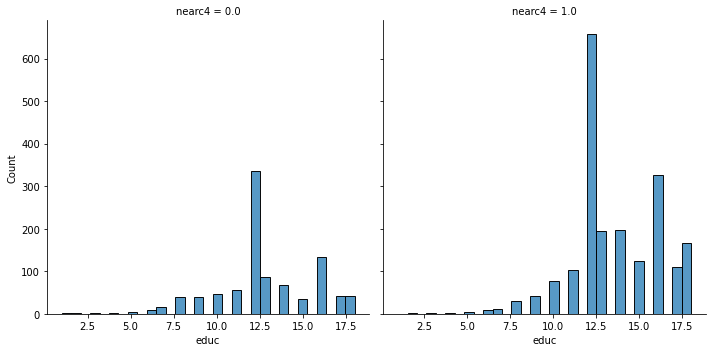

In [3]:
sns.displot(card, x = "educ", col = "nearc4")


- *Patrones*: Se observa que la variable "vivir cerca a la universidad" sí tiene un efecto en los años de educación de las personas. A nivel de este estudio, se puede concluir que vivir cerca a alguna universidad aumenta el promedio de años de educación recibida. 

#### 1.2 Grafique dos histogramas para la variable años del logaritmos de los ingresos $lwage$ para cuando $nearc4 == 1$, y cuando $nearc4 == 0$. Compare y describa los patrones que encuentra.

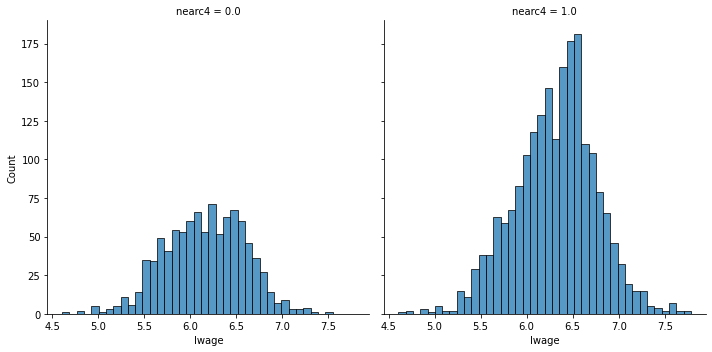

In [8]:
sns.displot(card, x = "lwage", col = "nearc4")


- *Patrones*: Se observa una distribuación normal, es decir con concentración de datos en los valores medios de los ingresos económicos, tanto en el grupo de personas que vive cerca a la universidad como en el que no. Si bien se advierte una diferencia en la cantidad de personas pertenecientes a cada grupo, en ambos casos no se observa una gran cantidad de personas con ingresos muy bajos o muy altos.

### 2. Regresiones

#### 2.1 Regresión lineal:

In [5]:
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = card).fit()

ols_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Fri, 25 Nov 2022   Prob (F-statistic):          1.97e-232
Time:                        13:33:35   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **Interpretación**: Considerando que todas las variables tienen un p-valor menor a 0.05 y que son significativas, se puede concluir lo siguiente:

    - Por cada año adicional de educación, se espera que el nivel de ingreso aumente en 0.07 unidades logaritmicas. 
    - Por cada año adicional de experiencia laboral, se espera que el nivel de ingresos aumente en 0.03 unidades logaritimicas. 
    - Si se trata de una persona afroamericana, se espera que el nivel de ingresos disminuya en 0.16 unidades logaritmicas . 
    - Si la persona vive en el sur, se espera que el nivel de ingresos disminuya en 0.13 unidades logarítmicas. 
    - Si se trata de una persona casada, se espera que el nivel de ingresos disminuya en 0.03 unidades logarítimas. 
    - Si la persona vive en SMSA, se espera que el nivel de ingresos aumente en 0.17 unidades logarítmicas.

#### 2.2 Regresión IV: instrumentalizar $educ$ y $nearc2$

In [6]:
card['married'] = card['married'].fillna(0) 


In [7]:
iv_reg = IV2SLS.from_formula("lwage ~ 1 + exper + black + south + married + smsa + [educ ~ nearc2]", card).fit()
iv_reg.summary


<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                     -1.3114
Estimator:                    IV-2SLS   Adj. R-squared:                -1.3160
No. Observations:                3010   F-statistic:                    289.62
Date:                Fri, Nov 25 2022   P-value (F-stat)                0.0000
Time:                        13:35:08   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.1276     3.1412     0.0406     0.9676     -6.0290      6.2843
black          0.1134     0.1816     0.6244     0.5324     -0.2425      0.4692
exper          0.1515     0.0747     2.0274     0.0426      0.0050      0.2980
married       -0.0151     0.0147    -1.0258     0.3050     -0.0438      0.0137
smsa           0.0201     0.1030     0.1949     0.8455     -0.1819      0.2220
south         -0.0319     0.0692    -0.4603     0.6453     -0.1675      0.1038
educ           0.3618     0.1849     1.9562     0.0504     -0.0007      0.7243
==============================================================================

Endogenous: educ
Instruments: nearc2
Robust Covariance (Heteroskedastic)
Debiased: False
"""

- *Comparación*: En general, se observa que cada año adicional de escolaridad genera que los ingresos de los encuestados aumenten en aproximadamente 7,1%. Por otra parte, con respecto a la instrumentalización de variables, se observa que el coeficiente de la variable educación es mucho mayor que el encontrado en la regresión lineal: alrededor de un 75% mayor. Asimismo, dado que el F-statistic excede a 15, no se advierte un problema de instrumento débil. De esta manera, el rendimiento de la educación asociado con esta estimación 2SLS es 0,127; es decir, por cada año adicional de educación se espera que los ingresos aumenten en un 12,7%.